solution:
0.115851 x + 0.378981 y + -2.598196 = z


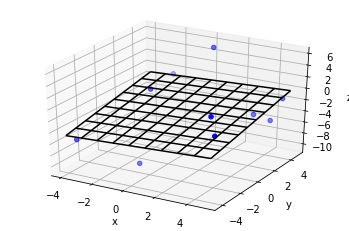

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N_POINTS = 10# количество точек
TARGET_X_SLOPE = 0 # задаём наклон подразумеваемой плоскости по оси X
TARGET_y_SLOPE = 0 # задаём наклон подразумеваемой плоскости по оси Y
TARGET_OFFSET  = 0 # параметр смещения подразумеваемой плоскости по оси Z
EXTENTS = 5        # протяжённость пространства
NOISE = 5          # помеха

# Создаём(рандомим) облако точек
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))

# Рисуем точки
plt.figure() 
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# Подгоняем параметры
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T              # задание матрицы b
A = np.matrix(tmp_A)                # Задание матрицы А
fit = (A.T * A).I * A.T * b         # Вычисление параметров

print ("solution:")
print ("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2])) #вывод параметров

# Рисуем плоскость
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()